In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [9]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

# 0 -- tumour
# 1 -- not

OneHotEncoder()

In [11]:
data = []
paths = []
result = []

for r,d,f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(np.array(img)))
        result.append(encoder.transform([[0]]).toarray())

In [12]:
data = []
paths = []
result = []

for r,d,f in os.walk('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(np.array(img)))
        result.append(encoder.transform([[0]]).toarray())

In [13]:
data = np.array(data)
data.shape

(69, 128, 128, 3)

In [14]:
result = np.array(result)
result = result.reshape(69,2)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size = 0.2, shuffle = True, random_state = 0)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax')

print(model.summary())


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [19]:
y_train.shape

(55, 2)

In [20]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data= (x_test,y_test))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 2.5676 - val_loss: 0.0000e+00
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 924ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 943ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 937ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 877ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 904ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 901ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 885ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 944ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - loss: 0.0000e+00 - val_loss: 0.0000e

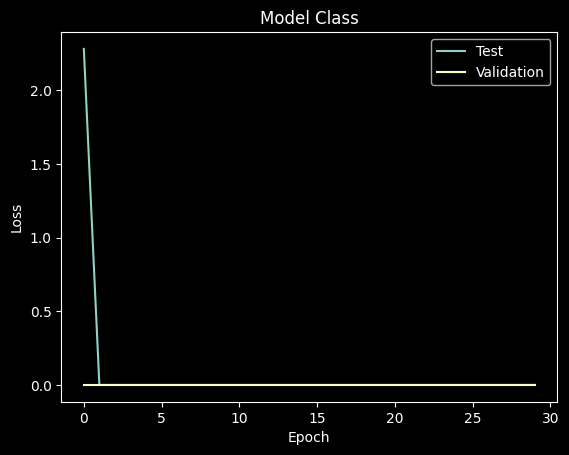

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Class')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test','Validation'], loc = 'upper right')
plt.show()

In [23]:
def names(number):
    if number == 0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This is Its a Tumor


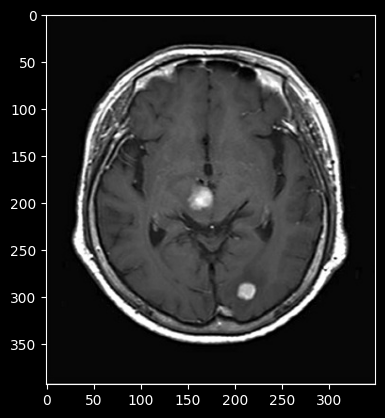

In [27]:
from matplotlib.pyplot import imshow
img = Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% Confidence This is ' + names(classification))

100.0% Confidence This is Its a Tumor


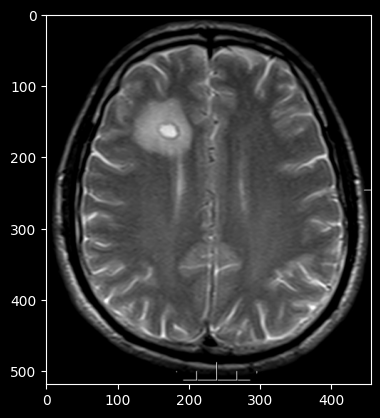

In [28]:
from matplotlib.pyplot import imshow
img = Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% Confidence This is ' + names(classification))